In [2]:
from keras.datasets import mnist
from keras.callbacks import TensorBoard
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer,Conv2D, Flatten, Dense,UpSampling2D
import numpy as np
import matplotlib.pyplot as plt
import random

Prepare dataset

In [53]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.    
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))   
print(x_train.shape,x_test.shape)


(60000, 784) (10000, 784)


Create network 

In [54]:
print("Creating Network...")
input_img = layers.Input(shape=(784,)) #keras.Input(shape=(28, 28, 1))
Encoder = layers.Dense(400, activation='relu')(input_img)
Encoder = layers.Dense(300, activation='relu')(Encoder)
Encoder = layers.Dense(150, activation='relu')(Encoder)
LatentSpace = layers.Dense(65, activation='relu')(Encoder)#buttle neck layer

# Decoder Definition
Decoder = layers.Dense(150, activation='relu')(LatentSpace)
Decoder = layers.Dense(300, activation='relu')(Decoder)
Decoder = layers.Dense(400, activation='relu')(Decoder)
decoded = layers.Dense(784, activation='relu')(Decoder)

Model = keras.Model(input_img, decoded)
Model_encoder = keras.Model(input_img,LatentSpace)

Model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
Model.summary()

Creating Network...
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 400)               314000    
                                                                 
 dense_9 (Dense)             (None, 300)               120300    
                                                                 
 dense_10 (Dense)            (None, 150)               45150     
                                                                 
 dense_11 (Dense)            (None, 65)                9815      
                                                                 
 dense_12 (Dense)            (None, 150)               9900      
                                                                 
 dense_13 (Dense)            (None, 300

Recunstruction step

In [55]:
print("Training Network")
history=Model.fit(x_train,x_train,
            epochs=10,
            batch_size=256,
            validation_data=(x_test,x_test),
            )

Training Network
Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.3596 - accuracy: 0.0088 - val_loss: 0.3008 - val_accuracy: 0.0079
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2601 - accuracy: 0.0104 - val_loss: 0.2596 - val_accuracy: 0.0079
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2540 - accuracy: 0.0113 - val_loss: 0.2678 - val_accuracy: 0.0086
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2554 - accuracy: 0.0107 - val_loss: 0.2390 - val_accuracy: 0.0128
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2376 - accuracy: 0.0131 - val_loss: 0.2383 - val_accuracy: 0.0145
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2579 - accuracy: 0.0097 - val_loss: 0.2364 - val_accuracy: 0.0114
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2360 - accuracy: 0.0091 - val_loss: 0.2342 - val_accura

accuracy and test report for reconstruction step

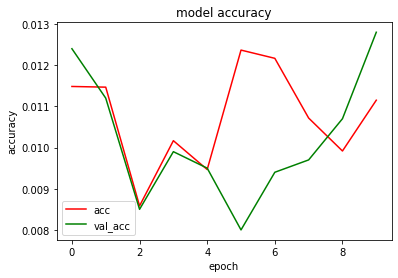

In [5]:
plt.plot(history.history['accuracy'], label='acc', color='red')
plt.plot(history.history['val_accuracy'], label='val_acc', color='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

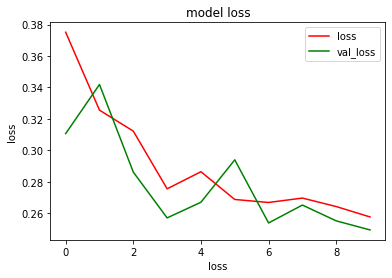

In [6]:
plt.plot(history.history['loss'], label='loss', color='red')
plt.plot(history.history['val_loss'], label='val_loss', color='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('loss')
plt.legend()
plt.show()

Displaying 0 to 9 images

Showing Images


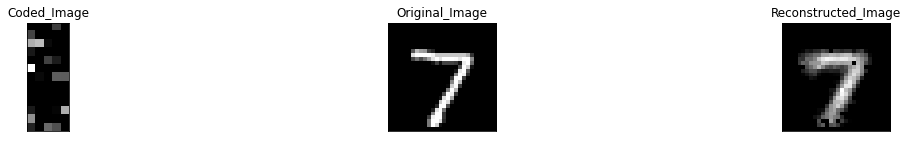

Showing Images


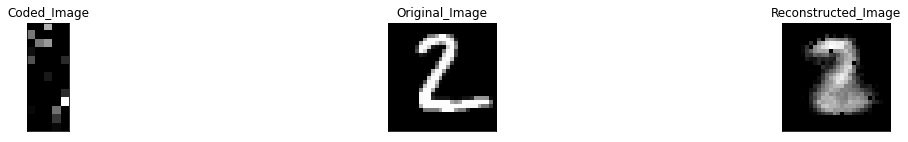

Showing Images


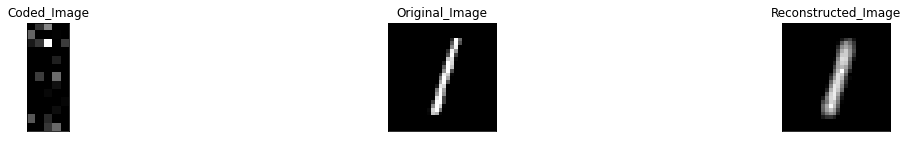

Showing Images


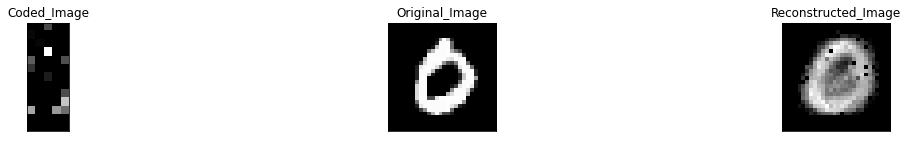

Showing Images


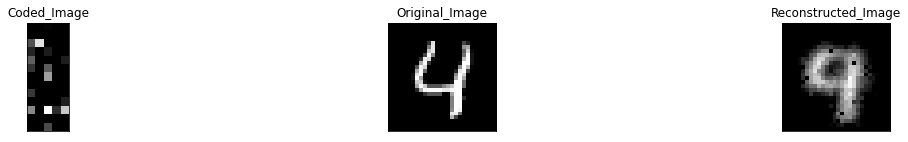

Showing Images


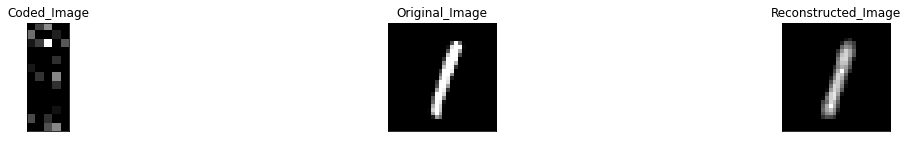

Showing Images


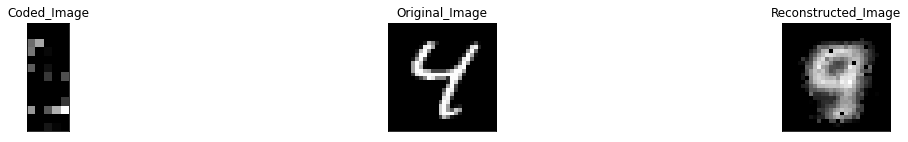

Showing Images


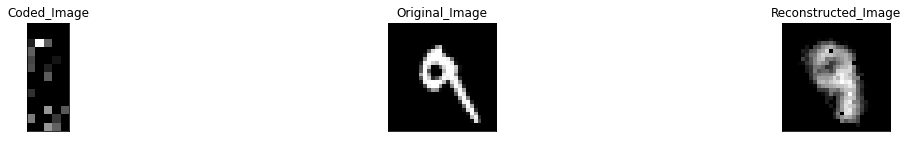

Showing Images


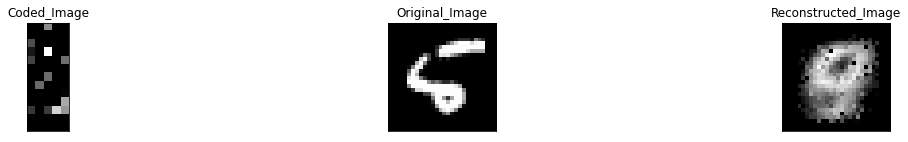

Showing Images


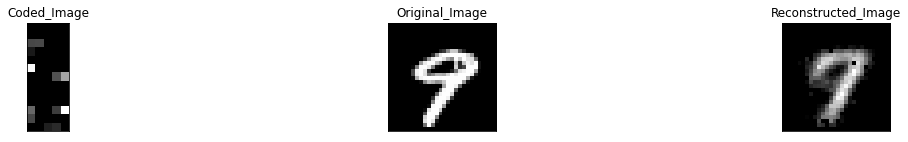

In [20]:
def Display(Coded_Image,Reconstructed_Image,Original_Image):
    print("Showing Images")
    plt.figure(figsize=(20, 2))
    # Input
    ax = plt.subplot(1, 3, 1)
    plt.imshow(Coded_Image.reshape(13, 5))
    plt.gray()
    plt.title("Coded_Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Original Image
    ax = plt.subplot(1, 3, 2)
    plt.imshow(Original_Image.reshape(28, 28))
    plt.gray()
    plt.title("Original_Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #Recovered
    ax = plt.subplot(1, 3, 3)
    plt.imshow(Reconstructed_Image.reshape(28, 28))
    plt.gray()
    plt.title("Reconstructed_Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.show()

for i in [0,1,2,3,4,5,6,7,8,9]:
    reconstruct= Model.predict(np.array([x_test[i],]))[0]
    code= Model_encoder.predict(np.array([x_test[i],]))[0]
    Display(code, reconstruct , x_test[i])


Loading mnist

In [30]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.    
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))   

De-noising

Noise function

In [5]:
x_train_noisy = x_train + 0.6 * np.random.normal(loc=0.0, scale=1.0, size= x_train.shape) 
x_test_noisy = x_test + 0.6 * np.random.normal(loc=0.0, scale=1.0, size= x_test.shape) 

x_train_noisy = np.clip( x_train_noisy, 0., 1.)
x_test_noisy = np.clip( x_test_noisy, 0., 1.)

print("noise is injected")


noise is injected


Training with noisy images

In [6]:
print("Training Network")
history= Model.fit(x_train_noisy, x_train,
                    epochs=10,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test_noisy, x_test))

Training Network
Epoch 1/10
235/235 [==============================] - 5s 6ms/step - loss: 0.4589 - accuracy: 0.0081 - val_loss: 0.3728 - val_accuracy: 0.0012
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3473 - accuracy: 0.0099 - val_loss: 0.3451 - val_accuracy: 0.0179
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3256 - accuracy: 0.0126 - val_loss: 0.3327 - val_accuracy: 0.0073
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3191 - accuracy: 0.0109 - val_loss: 0.3071 - val_accuracy: 0.0139
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3043 - accuracy: 0.0162 - val_loss: 0.3048 - val_accuracy: 0.0110
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2933 - accuracy: 0.0123 - val_loss: 0.2859 - val_accuracy: 0.0128
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2897 - accuracy: 0.0142 - val_loss: 0.2899 - val_accura

Evaluation

In [7]:
Model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2872 - accuracy: 0.0115


[0.2871840298175812, 0.011500000022351742]

ploting accuracy and loss for training with noisy data

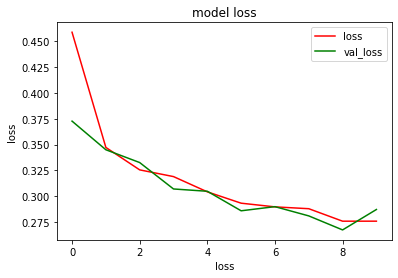

In [10]:
#loss

plt.plot(history.history['loss'], label='loss', color='red')
plt.plot(history.history['val_loss'], label='val_loss', color='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('loss')
plt.legend()
plt.show()

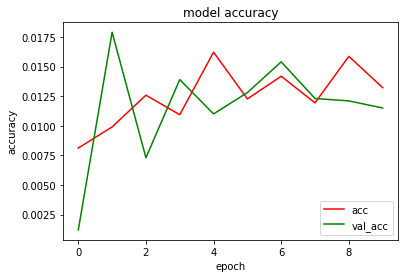

In [9]:
#accuracy

plt.plot(history.history['accuracy'], label='acc', color='red')
plt.plot(history.history['val_accuracy'], label='val_acc', color='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

Denoising with auto encoder

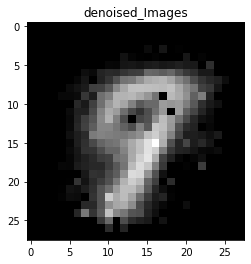

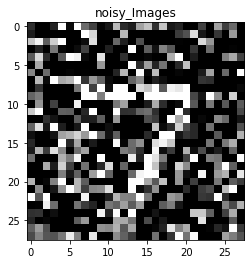

In [16]:
denoised_Images=Model.predict(x_test_noisy)
plt.imshow(denoised_Images[0].reshape(28, 28))
plt.gray()
plt.title("denoised_Images")
plt.show()

plt.imshow(x_test_noisy[0].reshape(28, 28))
plt.gray()
plt.title("noisy_Images")
plt.show()

Training with denoised imgaes

In [21]:
print("Training Network")
history= Model.fit(denoised_Images, denoised_Images,
                    epochs=10,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test))

Training Network
Epoch 1/10
40/40 [==============================] - 0s 11ms/step - loss: 0.2226 - accuracy: 0.8784 - val_loss: 0.2822 - val_accuracy: 0.0114
Epoch 2/10
40/40 [==============================] - 0s 9ms/step - loss: 0.2227 - accuracy: 0.8918 - val_loss: 0.2838 - val_accuracy: 0.0113
Epoch 3/10
40/40 [==============================] - 0s 9ms/step - loss: 0.2225 - accuracy: 0.8895 - val_loss: 0.2829 - val_accuracy: 0.0118
Epoch 4/10
40/40 [==============================] - 0s 9ms/step - loss: 0.2223 - accuracy: 0.8951 - val_loss: 0.2836 - val_accuracy: 0.0111
Epoch 5/10
40/40 [==============================] - 0s 8ms/step - loss: 0.2224 - accuracy: 0.8861 - val_loss: 0.2838 - val_accuracy: 0.0106
Epoch 6/10
40/40 [==============================] - 0s 9ms/step - loss: 0.2225 - accuracy: 0.8938 - val_loss: 0.2847 - val_accuracy: 0.0109
Epoch 7/10
40/40 [==============================] - 0s 9ms/step - loss: 0.2224 - accuracy: 0.8991 - val_loss: 0.2840 - val_accuracy: 0.0110
Ep

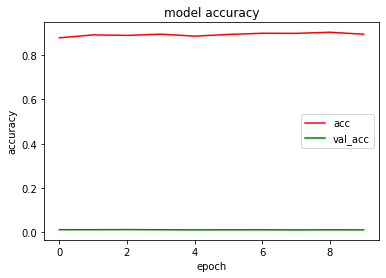

In [23]:
#accuracy

plt.plot(history.history['accuracy'], label='acc', color='red')
plt.plot(history.history['val_accuracy'], label='val_acc', color='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

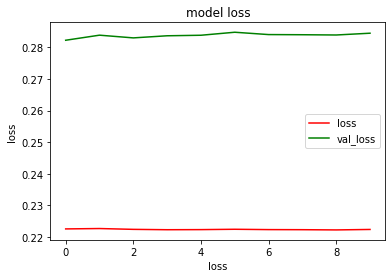

In [24]:
#loss

plt.plot(history.history['loss'], label='loss', color='red')
plt.plot(history.history['val_loss'], label='val_loss', color='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('loss')
plt.legend()
plt.show()

Showing Images


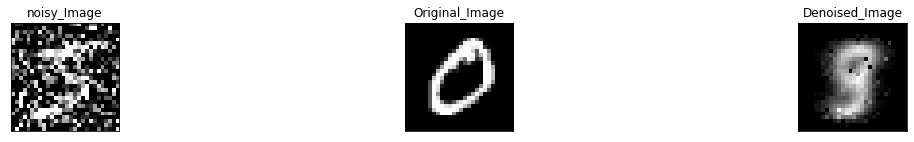

Showing Images


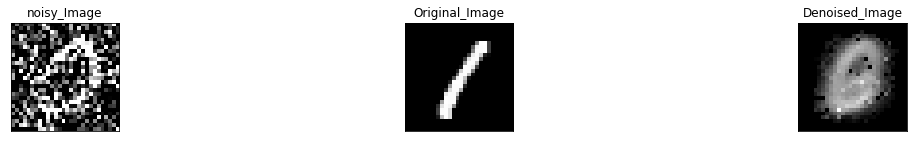

Showing Images


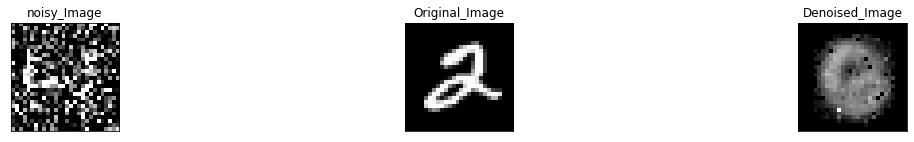

Showing Images


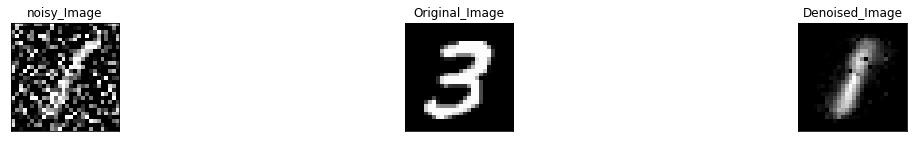

Showing Images


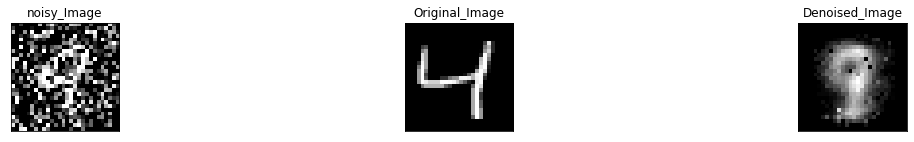

Showing Images


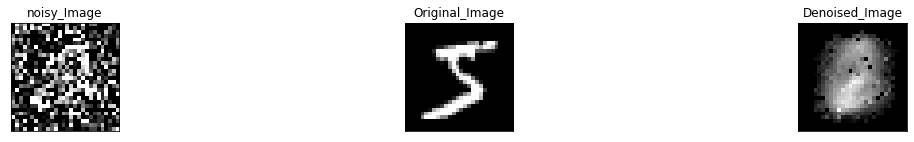

Showing Images


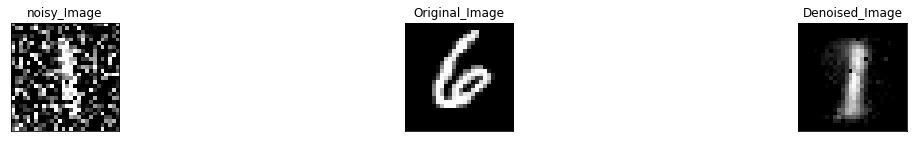

Showing Images


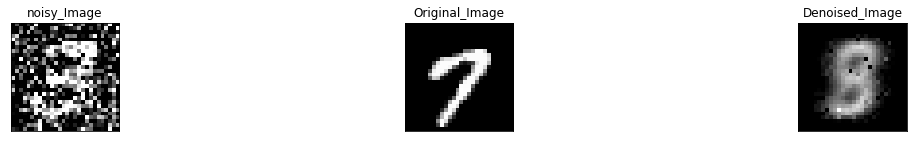

Showing Images


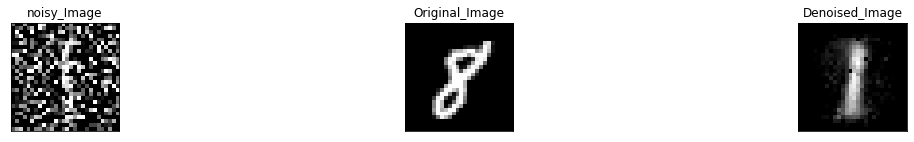

Showing Images


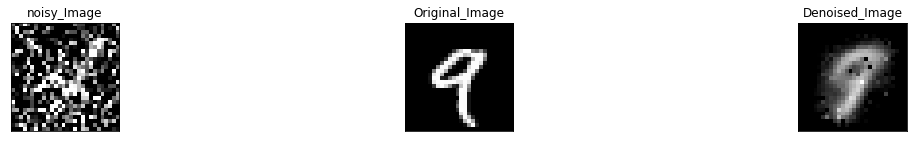

In [50]:
def Display(noisy_Image,Reconstructed_Image,Original_Image):
    print("Showing Images")
    plt.figure(figsize=(20, 2))
    # Input
    ax = plt.subplot(1, 3, 1)
    plt.imshow(noisy_Image.reshape(28, 28))
    plt.gray()
    plt.title("noisy_Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Original Image
    ax = plt.subplot(1, 3, 2)
    plt.imshow(Original_Image.reshape(28, 28))
    plt.gray()
    plt.title("Original_Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #Recovered
    ax = plt.subplot(1, 3, 3)
    plt.imshow(Reconstructed_Image.reshape(28, 28))
    plt.gray()
    plt.title("Denoised_Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.show()

for i in [0,1,2,3,4,5,6,7,8,9]:
    denoised= Model.predict(np.array([x_train_noisy[i],]))[0]
    Display(x_train_noisy[i], denoised , x_train[i])

Displaying 20 images of train *images*

Showing Images


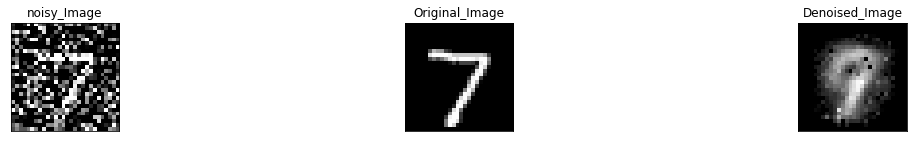

Showing Images


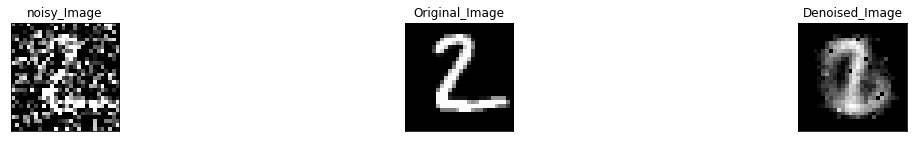

Showing Images


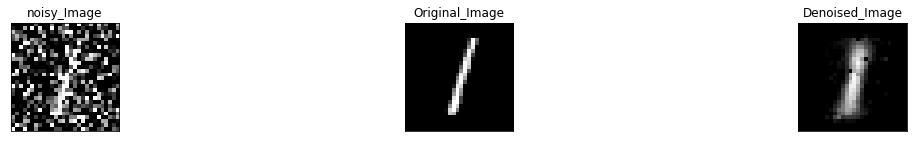

Showing Images


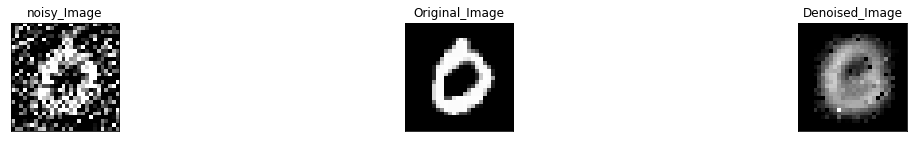

Showing Images


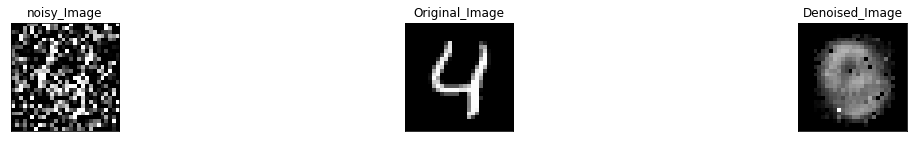

Showing Images


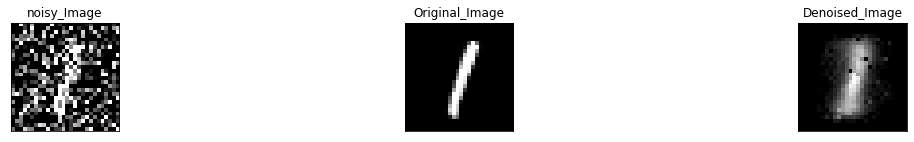

Showing Images


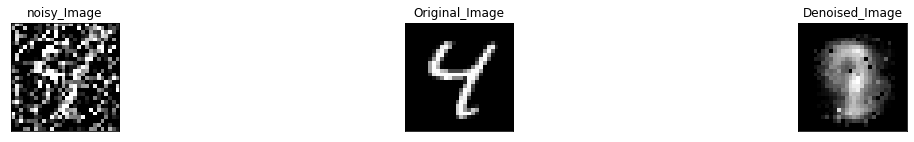

Showing Images


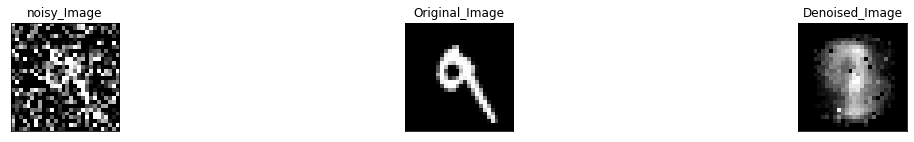

Showing Images


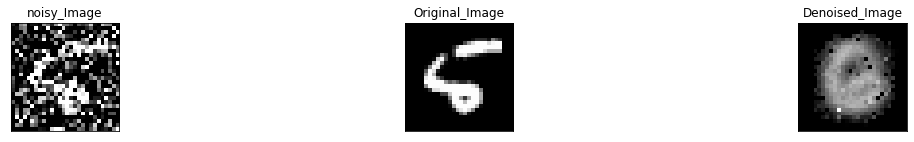

Showing Images


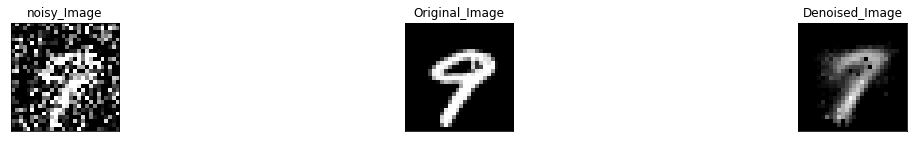

Showing Images


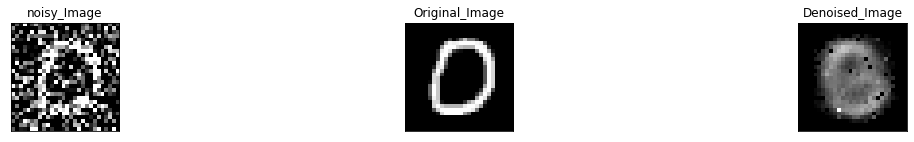

Showing Images


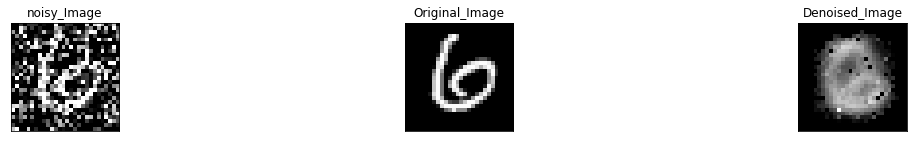

Showing Images


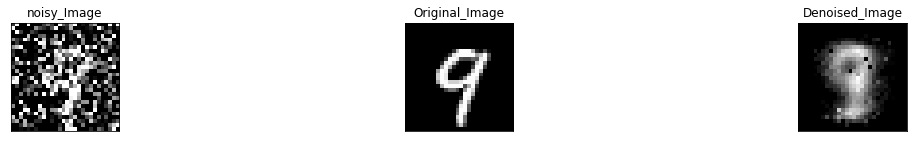

Showing Images


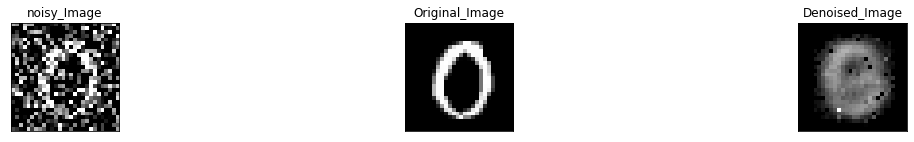

Showing Images


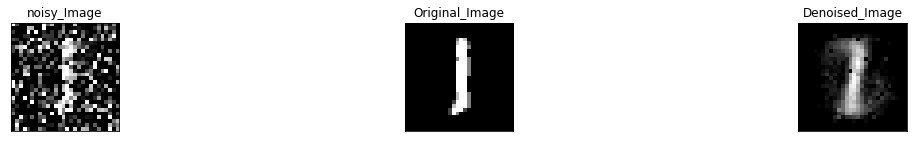

Showing Images


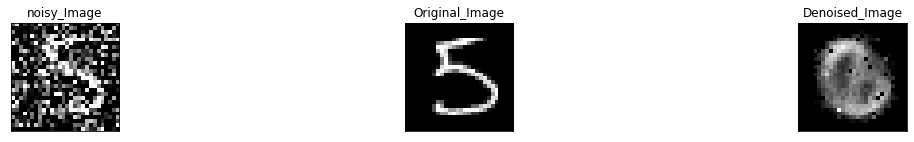

Showing Images


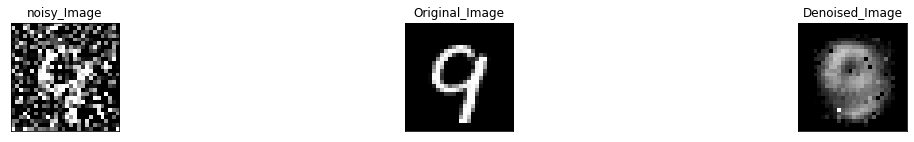

Showing Images


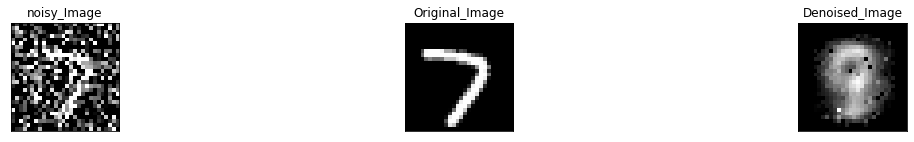

Showing Images


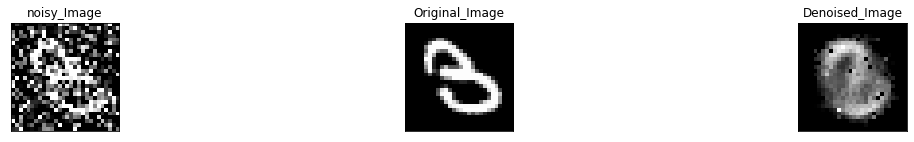

Showing Images


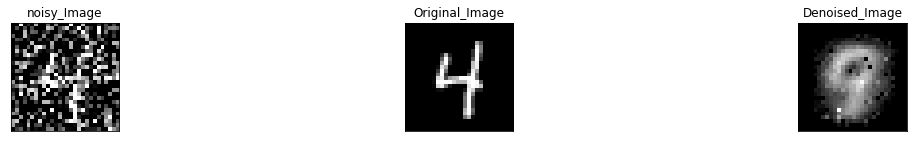

In [51]:
def Display(noisy_Image,Reconstructed_Image,Original_Image):
    print("Showing Images")
    plt.figure(figsize=(20, 2))
    # Input
    ax = plt.subplot(1, 3, 1)
    plt.imshow(noisy_Image.reshape(28, 28))
    plt.gray()
    plt.title("noisy_Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Original Image
    ax = plt.subplot(1, 3, 2)
    plt.imshow(Original_Image.reshape(28, 28))
    plt.gray()
    plt.title("Original_Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #Recovered
    ax = plt.subplot(1, 3, 3)
    plt.imshow(Reconstructed_Image.reshape(28, 28))
    plt.gray()
    plt.title("Denoised_Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.show()

# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# train_filter = np.unique(y_train, return_index=True)
# x_train, y_train = x_train[train_filter[1:]], y_train[train_filter[1:]]

for i in range(20):
    denoised= Model.predict(np.array([x_test_noisy[i],]))[0]
    Display(x_test_noisy[i], denoised , x_test[i])